In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/processed_train_v2.csv")

In [19]:
df

,id,date,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
date,,,,,,,,,,,,,,,,
2013-01-01,0,2013-01-01,1,0,0.000,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,1,2013-01-01,1,1,0.000,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,2,2013-01-01,1,2,0.000,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,3,2013-01-01,1,3,0.000,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,4,2013-01-01,1,4,0.000,0,3,93.14,18,12,3,13,2,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,3000883,2017-08-15,9,28,438.133,0,3,47.57,18,12,1,6,2,15,8,2017
2017-08-15,3000884,2017-08-15,9,29,154.553,1,3,47.57,18,12,1,6,2,15,8,2017
2017-08-15,3000885,2017-08-15,9,30,2419.729,148,3,47.57,18,12,1,6,2,15,8,2017


In [4]:
df.index = pd.to_datetime(df['date'])

In [5]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
date,,,,,,,,,,,,,,,,
2013-01-01,0,2013-01-01,1,0,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,1,2013-01-01,1,1,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,2,2013-01-01,1,2,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,3,2013-01-01,1,3,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2013-01-01,4,2013-01-01,1,4,0.0,0,3,93.14,18,12,3,13,2,1,1,2013


In [6]:
sales = df['sales']

<Axes: xlabel='date'>

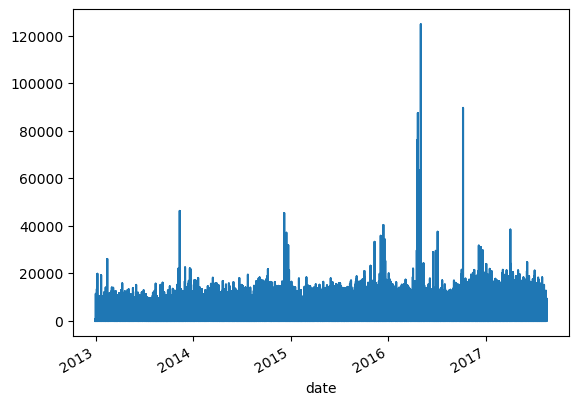

In [7]:
sales.plot()

In [14]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [15]:
WINDOW_SIZE = 7

In [16]:
X1, y1 = df_to_X_y(sales, WINDOW_SIZE)

In [31]:
X1.shape, y1.shape

((3000881, 7, 1), (3000881,))

In [32]:
X_train1, y_train1 = X1[:2400710], y1[:2400710]
X_val1, y_val1 = X1[2400710:2700799], y1[2400710:2700799]
X_test1, y_test1 = X1[2700799:], y1[2700799:]

In [33]:
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2400710, 7, 1),
 (2400710,),
 (300089, 7, 1),
 (300089,),
 (300082, 7, 1),
 (300082,))

In [42]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [36]:
model1 = Sequential()
model1.add(InputLayer((7, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'relu'))

In [37]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)

In [39]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [41]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), batch_size=1000, epochs=10, callbacks=[cp1])

Epoch 1/10
2397/2401 [============================>.] - ETA: 0s - loss: 316139.6875 - root_mean_squared_error: 562.2630INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 28s 12ms/step - loss: 316046.9375 - root_mean_squared_error: 562.1805 - val_loss: 659186.1875 - val_root_mean_squared_error: 811.9028
Epoch 2/10
2400/2401 [============================>.] - ETA: 0s - loss: 283112.6875 - root_mean_squared_error: 532.0834INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 27s 11ms/step - loss: 283081.9688 - root_mean_squared_error: 532.0545 - val_loss: 587102.0625 - val_root_mean_squared_error: 766.2258
Epoch 3/10
2400/2401 [============================>.] - ETA: 0s - loss: 250358.4219 - root_mean_squared_error: 500.3583INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 27s 11ms/step - loss: 250333.0469 - root_mean_squared_error: 500.3329 - val_loss: 524874.7500 - val_root_mean_squared_error: 724.4824
Epoch 4/10
2400/2401 [============================>.] - ETA: 0s - loss: 225060.6094 - root_mean_squared_error: 474.4055INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 27s 11ms/step - loss: 225041.5312 - root_mean_squared_error: 474.3854 - val_loss: 497512.3125 - val_root_mean_squared_error: 705.3455
Epoch 5/10
2398/2401 [============================>.] - ETA: 0s - loss: 203077.8281 - root_mean_squared_error: 450.6416INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 27s 11ms/step - loss: 203007.3281 - root_mean_squared_error: 450.5634 - val_loss: 435148.7812 - val_root_mean_squared_error: 659.6581
Epoch 6/10
2399/2401 [============================>.] - ETA: 0s - loss: 186495.5156 - root_mean_squared_error: 431.8513INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 28s 12ms/step - loss: 186431.2500 - root_mean_squared_error: 431.7769 - val_loss: 422889.0625 - val_root_mean_squared_error: 650.2992
Epoch 7/10
2397/2401 [============================>.] - ETA: 0s - loss: 174513.8438 - root_mean_squared_error: 417.7485INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 28s 12ms/step - loss: 174427.6406 - root_mean_squared_error: 417.6454 - val_loss: 370551.7812 - val_root_mean_squared_error: 608.7297
Epoch 8/10
2401/2401 [==============================] - ETA: 0s - loss: 162191.6406 - root_mean_squared_error: 402.7302INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 28s 12ms/step - loss: 162191.6406 - root_mean_squared_error: 402.7302 - val_loss: 355030.8125 - val_root_mean_squared_error: 595.8446
Epoch 9/10
2400/2401 [============================>.] - ETA: 0s - loss: 154340.3594 - root_mean_squared_error: 392.8618INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 27s 11ms/step - loss: 154320.0312 - root_mean_squared_error: 392.8359 - val_loss: 342412.6875 - val_root_mean_squared_error: 585.1604
Epoch 10/10
2398/2401 [============================>.] - ETA: 0s - loss: 146996.0312 - root_mean_squared_error: 383.4006INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


2401/2401 [==============================] - 27s 11ms/step - loss: 146947.9375 - root_mean_squared_error: 383.3379 - val_loss: 321167.2188 - val_root_mean_squared_error: 566.7162


In [43]:
model1 = load_model('model1/')

In [45]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})

75023/75023 [==============================] - 35s 471us/step


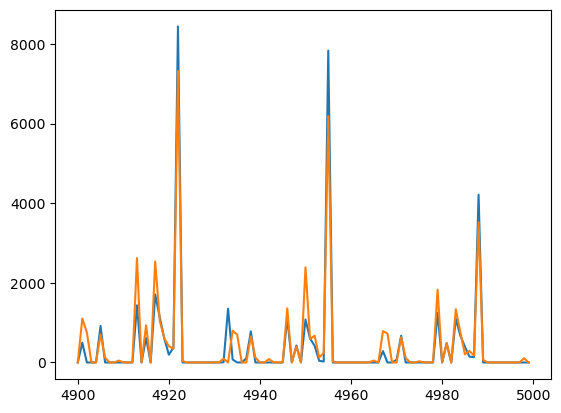

In [60]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][4900:5000])
plt.plot(train_results['Actuals'][4900:5000])

In [54]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})

9378/9378 [==============================] - 4s 465us/step


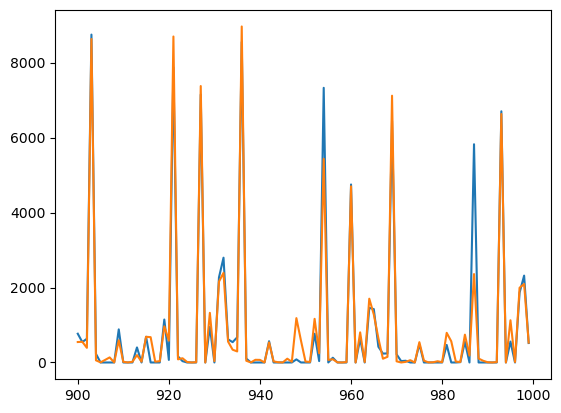

In [59]:
plt.plot(val_results['Val Predictions'][900:1000])
plt.plot(val_results['Actuals'][900:1000])

In [61]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})

9378/9378 [==============================] - 5s 485us/step


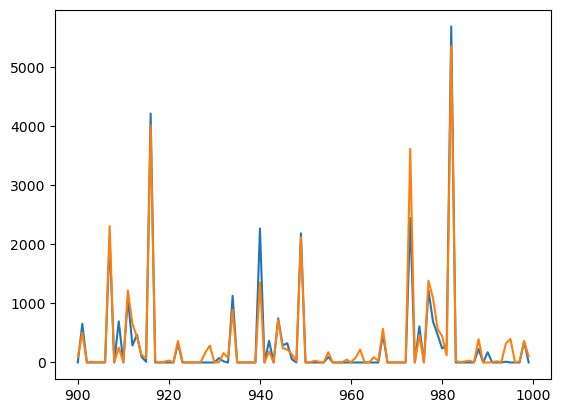

In [64]:
plt.plot(test_results['Test Predictions'][900:1000])
plt.plot(test_results['Actuals'][900:1000])